In [19]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [3]:
# Locate CSV files
crime18 = "../crime_2018_cleaned.csv"

# Read Files
crime_data = pd.read_csv(crime18)


In [4]:
# View crime_2016 file
crime_data

,State,City,Year,Population1,Violent \ncrime,Murder,Rape2,Robbery,Aggravated \nassault,Property \ncrime,Burglary,Larceny-\ntheft,Motor \nvehicle \ntheft,Arson3
0,ALABAMA,BIRMINGHAM,2017,"212,178","1,833",42,92,473,"1,226","6,472","1,293","4,360",819,113
1,ALABAMA,BIRMINGHAM,2018,"212,178","1,978",47,86,398,"1,447","6,280","1,152","4,233",895,76
2,ALABAMA,MOBILE4,2017,"248,431",937,22,57,236,622,"6,493","1,509","4,399",585,35
3,ALABAMA,MOBILE5,2018,"248,431",820,15,73,185,547,"6,027","1,235","4,183",609,24
4,ALABAMA,MONTGOMERY,2017,"199,099",656,19,35,185,417,"4,246","1,031","2,797",418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,WASHINGTON,VANCOUVER,2018,"176,884",402,2,87,70,243,"2,876",393,"1,981",502,20
550,WISCONSIN,GREEN BAY,2017,"105,331",211,0,39,25,147,920,139,751,30,7
551,WISCONSIN,GREEN BAY,2018,"105,331",243,1,40,25,177,810,106,657,47,3
552,WISCONSIN,MADISON,2017,"255,850",477,7,39,110,321,"3,243",433,"2,651",159,5


In [5]:
# Rename Columns
crime_data.columns = ["State", "City", "Year", "Population", "Violent Crime", "Murder", "Rape", "Robbery", "Assault", "Property", "Burglary",
                "Larceny", "MV Theft", "Arson"]

In [6]:
#Drop commas from all values
crime_data = crime_data.replace(',','', regex=True)

In [7]:
# Specify columns to analyze
cols = ["Year", "Population", "Violent Crime", "Murder", "Rape", "Robbery", "Assault", "Property", "Burglary", "Larceny", "MV Theft", "Arson"]
crime_data

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
0,ALABAMA,BIRMINGHAM,2017,212178,1833,42,92,473,1226,6472,1293,4360,819,113
1,ALABAMA,BIRMINGHAM,2018,212178,1978,47,86,398,1447,6280,1152,4233,895,76
2,ALABAMA,MOBILE4,2017,248431,937,22,57,236,622,6493,1509,4399,585,35
3,ALABAMA,MOBILE5,2018,248431,820,15,73,185,547,6027,1235,4183,609,24
4,ALABAMA,MONTGOMERY,2017,199099,656,19,35,185,417,4246,1031,2797,418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,WASHINGTON,VANCOUVER,2018,176884,402,2,87,70,243,2876,393,1981,502,20
550,WISCONSIN,GREEN BAY,2017,105331,211,0,39,25,147,920,139,751,30,7
551,WISCONSIN,GREEN BAY,2018,105331,243,1,40,25,177,810,106,657,47,3
552,WISCONSIN,MADISON,2017,255850,477,7,39,110,321,3243,433,2651,159,5


In [8]:
# Change to type to (int)
crime_data[cols] = crime_data[cols].astype(int)
crime_data.fillna(0)
crime_data

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
0,ALABAMA,BIRMINGHAM,2017,212178,1833,42,92,473,1226,6472,1293,4360,819,113
1,ALABAMA,BIRMINGHAM,2018,212178,1978,47,86,398,1447,6280,1152,4233,895,76
2,ALABAMA,MOBILE4,2017,248431,937,22,57,236,622,6493,1509,4399,585,35
3,ALABAMA,MOBILE5,2018,248431,820,15,73,185,547,6027,1235,4183,609,24
4,ALABAMA,MONTGOMERY,2017,199099,656,19,35,185,417,4246,1031,2797,418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,WASHINGTON,VANCOUVER,2018,176884,402,2,87,70,243,2876,393,1981,502,20
550,WISCONSIN,GREEN BAY,2017,105331,211,0,39,25,147,920,139,751,30,7
551,WISCONSIN,GREEN BAY,2018,105331,243,1,40,25,177,810,106,657,47,3
552,WISCONSIN,MADISON,2017,255850,477,7,39,110,321,3243,433,2651,159,5


In [9]:
# Create copy to not change original df
nat_stats = crime_data.copy()

# Summation for national statistics
year_national = nat_stats.groupby("Year")[cols].sum()
del year_national["Year"]

national = pd.DataFrame(year_national)

In [10]:
national

,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
Year,,,,,,,,,,,
2017,87089545,275136,3955,23730,86416,166470,1345750,232191,943107,173054,8052
2018,87089545,264382,3627,24627,76748,164114,1285536,208459,909777,168176,7233


In [11]:
# Find Murder Capital
m_cap = nat_stats.loc[nat_stats.groupby("Year")["Murder"].max()]
m_cap

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
331,MINNESOTA,ROCHESTER,2018,115228,123,4,38,19,62,1045,139,854,52,1
253,GEORGIA,SAVANNAH-CHATHAM METROPOLITAN,2018,242941,453,10,81,129,233,2887,449,2091,347,5


In [12]:
# Specify columns to analyze
cols2 = ["Population", "Violent Crime", "Murder", "Rape", "Robbery", "Assault", "Property", "Burglary", "Larceny", "MV Theft", "Arson"]

# Create copy to not change original df
state_stats = crime_data.copy()

# Summation for state statistics
year_state = state_stats.groupby(["State", "Year"]).sum()
#del year_state["Year"]

state = pd.DataFrame(year_state)

In [12]:
state

Population  Violent Crime  Murder  Rape  Robbery  Assault  \
State      Year                                                              
ALABAMA    2017      760832           3638      85   202      963     2388   
           2018      760832           3610      77   201      806     2526   
ALASKA     2017      296188           1798      13   287      369     1129   
           2018      296188           1777      10   219      372     1176   
ARIZONA    2017     2504469           5070      50   680     1480     2860   
...                     ...            ...     ...   ...      ...      ...   
VIRGINIA   2018     1605919           2629      69   256      673     1631   
WASHINGTON 2017     1814022           4800      30   520     1379     2871   
           2018     1814022           5146      32   591     1457     3066   
WISCONSIN  2017      361181            688       7    78      135      468   
           2018      361181            759       4    95      118      542   

                 Property  Burglary  Larceny  MV Theft  Arson  
State      Year                                                
ALABAMA    2017     19164      4223    13031      1910    148  
           2018     18497      3796    12657      2044    100  
ALASKA     2017      7708      1089     5180      1439     31  
           2018      7655      1101     4832      1722     23  
ARIZONA    2017     38584      5815    29770      2999    151  
...                   ...       ...      ...       ...    ...  
VIRGINIA   2018     19515      2134    15567      1814     81  
WASHINGTON 2017     45985      7900    32247      5838    180  
           2018     45055      7669    31521      5865    165  
WISCONSIN  2017      4163       572     3402       189     12  
           2018      3723       518     2917       288      8  

[94 rows x 11 columns]

In [13]:
# Use the CSV downloaded df to start basis of spliting df
state_city = crime_data.copy()


In [14]:
# Group by year, view state by state
shuffle = state_city.sort_values(by=["Year", "State"])
shuffle

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
0,ALABAMA,BIRMINGHAM,2017,212178,1833,42,92,473,1226,6472,1293,4360,819,113
2,ALABAMA,MOBILE4,2017,248431,937,22,57,236,622,6493,1509,4399,585,35
4,ALABAMA,MONTGOMERY,2017,199099,656,19,35,185,417,4246,1031,2797,418,0
6,ALABAMA,MONTGOMERY,2017,101124,212,2,18,69,123,1953,390,1475,88,0
8,ALASKA,ANCHORAGE,2017,296188,1798,13,287,369,1129,7708,1089,5180,1439,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,WASHINGTON,SPOKANE,2018,217066,791,4,179,105,503,7371,958,5616,797,19
547,WASHINGTON,TACOMA,2018,213504,950,7,84,257,602,5641,963,3674,1004,46
549,WASHINGTON,VANCOUVER,2018,176884,402,2,87,70,243,2876,393,1981,502,20
551,WISCONSIN,GREEN BAY,2018,105331,243,1,40,25,177,810,106,657,47,3


In [15]:
# Split df by year into 2 new dfs
split_17 = shuffle[shuffle["Year"] <= 2017]

split_18 = shuffle[shuffle["Year"] >= 2018]

# Reset index on both dfs; delete columns with old index numbers
split_17 = split_17.reset_index()
del split_17["index"]

split_18 = split_18.reset_index()
del split_18["index"]

In [16]:
# Export dfs to ensure split is correct
split_17.to_csv("2017_Split_final.csv")
split_18.to_csv("2018_Split_final.csv")

In [17]:
### 2018 DATA SPLIT
# Delete year from df; group by State to calculate sum of data
del split_17["Year"]
grouped17 = split_17.groupby("State")[cols2].sum()
grouped17

,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
State,,,,,,,,,,,
ALABAMA,760832,3638,85,202,963,2388,19164,4223,13031,1910,148
ALASKA,296188,1798,13,287,369,1129,7708,1089,5180,1439,31
ARIZONA,2504469,5070,50,680,1480,2860,38584,5815,29770,2999,151
ARKANSAS,199314,1759,25,102,258,1374,6985,1260,5116,609,28
CALIFORNIA,19899648,51076,555,4235,18290,27996,273209,44975,178364,49870,2190
COLORADO,2298399,6018,73,1025,1344,3576,34218,5444,24661,5900,232
CONNECTICUT,507114,1596,29,93,620,854,6806,1018,4615,1173,55
FLORIDA,4777411,12597,188,1010,3410,7989,79560,12181,60013,7366,275
GEORGIA,1030856,3404,69,232,1085,2018,19849,3428,14073,2348,73


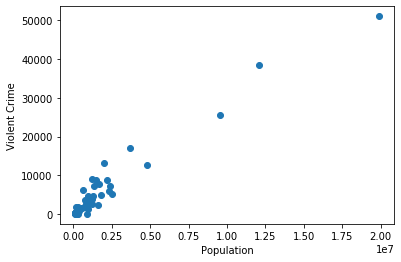

In [21]:
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(grouped17.iloc[:,0],grouped17.iloc[:,1])
plt.xlabel('Population')
plt.ylabel('Violent Crime')
plt.show()



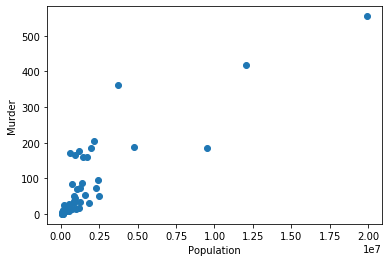

In [22]:
plt.scatter(grouped17.iloc[:,0],grouped17.iloc[:,2])
plt.xlabel('Population')
plt.ylabel('Murder')
plt.show()


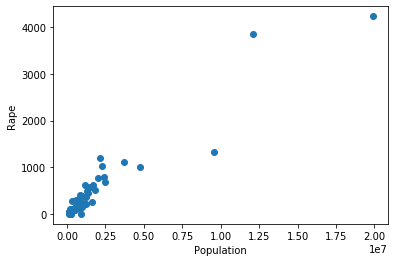

In [24]:
plt.scatter(grouped17.iloc[:,0],grouped17.iloc[:,3])
plt.xlabel('Population')
plt.ylabel('Rape')
plt.show()

In [28]:
# Delete year from df; group by State to calculate sum of data
#del split_18["Year"]
grouped18 = split_18.groupby("State")[cols2].sum()

grouped18


,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
State,,,,,,,,,,,
ALABAMA,760832,3610,77,201,806,2526,18497,3796,12657,2044,100
ALASKA,296188,1777,10,219,372,1176,7655,1101,4832,1722,23
ARIZONA,2504469,4933,60,760,1308,2805,37438,5004,29369,3065,163
ARKANSAS,199314,1326,20,120,149,1037,6145,1060,4576,509,24
CALIFORNIA,19899648,50773,488,4504,17787,27994,259162,41962,171662,45538,2374
COLORADO,2298399,6421,75,1014,1330,4002,36723,5472,24908,6343,242
CONNECTICUT,507114,1473,19,91,432,931,6823,958,4648,1217,55
FLORIDA,4777411,11749,193,1096,3005,7455,72492,9849,55979,6664,171
GEORGIA,1030856,3014,69,251,842,1852,18921,2835,13744,2342,55


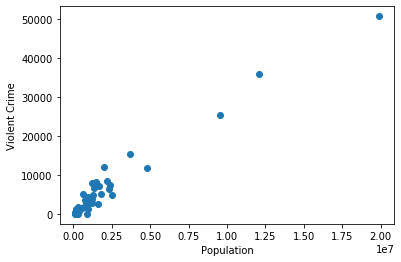

In [29]:
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(grouped18.iloc[:,0],grouped18.iloc[:,1])
plt.xlabel('Population')
plt.ylabel('Violent Crime')
plt.show()


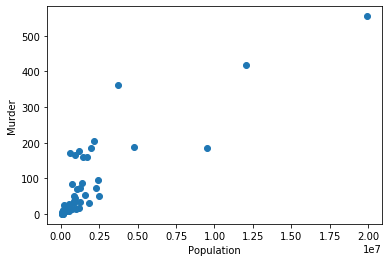

In [30]:
plt.scatter(grouped17.iloc[:,0],grouped17.iloc[:,2])
plt.xlabel('Population')
plt.ylabel('Murder')
plt.show()


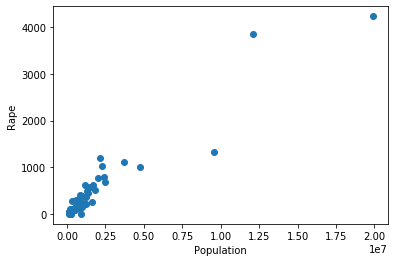

In [31]:
plt.scatter(grouped17.iloc[:,0],grouped17.iloc[:,3])
plt.xlabel('Population')
plt.ylabel('Rape')
plt.show()

In [18]:
group17_pop = grouped17.copy()
group17_pop = group17_pop.sort_values(by="Population", ascending=False)
group17_pop

,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
State,,,,,,,,,,,
CALIFORNIA,19899648,51076,555,4235,18290,27996,273209,44975,178364,49870,2190
TEXAS,12076463,38574,418,3845,11715,22596,203902,34684,147898,21320,984
NEW YORK,9546866,25451,185,1333,7650,16283,69718,7636,58604,3478,183
FLORIDA,4777411,12597,188,1010,3410,7989,79560,12181,60013,7366,275
ILLINOIS,3693308,16998,362,1102,6014,9520,52734,8622,37837,6275,389
ARIZONA,2504469,5070,50,680,1480,2860,38584,5815,29770,2999,151
NEVADA,2417597,7178,96,796,2200,4086,32062,8635,17854,5573,73
COLORADO,2298399,6018,73,1025,1344,3576,34218,5444,24661,5900,232
OHIO,2171371,8757,206,1204,3311,4036,45038,11593,28173,5272,246


In [19]:
# Specify new variable for calculation
cols3 = ["Violent Crime", "Murder", "Rape", "Robbery", "Assault", "Property", "Burglary", "Larceny", "MV Theft", "Arson"]

In [25]:
year_national["Total"] = ""
year_national["Total"] = year_national[cols3].sum(axis=1)
year_national

,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson,Total
Year,,,,,,,,,,,,
2017,87089545,275136,3955,23730,86416,166470,1345750,232191,943107,173054,8052,3257861
2018,87089545,264382,3627,24627,76748,164114,1285536,208459,909777,168176,7233,3112679
